## Stochastyczne równanie róźniczkowe - eksperymentalnie


Stochastyczne równania różniczkowe modelują układy dynamiczne, które np. są poddane zakłóceniom w postaci szumu. Są szeroko stosowane w fizyce, biologii, finansach i innych dziedzinach.
W tym przepisie symulujemy __Geometryczny ruch Browna__, który jest rozwiązaniem poniższego równania:

$\begin{cases}
dS = \mu Sdt + \sigma SdW\\
S(0) = s_{0}
\end{cases}$

gdzie $S(t)$ jest naszym procesem stochastycznym, $dS$ i $dt$ są nieskończenie małe, $\mu$ oznacza tzw. _dryf_, a $\sigma$ _zmienność_. Ponadto, $W$ jest ruchem Browna, uwzględniany w równaniu 
różniczkowym jako zakłócenie. 

In [9]:
import pandas as pd
import numpy as np
import math
import statsmodels.api as sm


import matplotlib.pyplot as plt
# plt.style.use('seaborn-darkgrid')
# plt.style.use('seaborn')

%matplotlib inline

Załóżmy:

In [10]:
mu = 0.552 # drift
sigma = 0.3590 # volatility
dt = .00025  # time step.
T = 1.  # total time.
n = int(T / dt)  # number of time steps.
t = np.linspace(0., T, n)  # vector of times.

np.random.seed(29)

Zdefiniujmy również zrenormalizowaną zmienną (aby uniknąć konieczności ponownego obliczania w każdym kroku czasowym) i stwórzmy wektor, który będzie zawierał wszystkie kolejne wartości naszego procesu podczas symulacji:

In [11]:
sqrtdt = np.sqrt(dt)
s = np.zeros(n)
s0 = s[0] = 250 # initial condition

Teraz utwórzmy naiwny rozwiązywacz za pomocą metody __Eulera-Maruyama__ (przypomnijmy sobie standardową metodę Eulera, której używaliśmy w Zadaniu I.32, ale z dodatkowym wyrazem stochastycznym, który jest po prostu skalowaną zmienną losową o rozkładzie normalnym).

In [12]:
np.random.seed(112)
for i in range(n - 1):
        s[i + 1] =  s[i] + dt * (mu * s[i]) + sigma * s[i]  * np.random.randn() * sqrtdt

Jak wygląda ewolucja procesu:

<>:4: SyntaxWarning: invalid escape sequence '\m'
<>:5: SyntaxWarning: invalid escape sequence '\s'
<>:4: SyntaxWarning: invalid escape sequence '\m'
<>:5: SyntaxWarning: invalid escape sequence '\s'
C:\Users\koste\AppData\Local\Temp\ipykernel_2684\1444024518.py:4: SyntaxWarning: invalid escape sequence '\m'
  "Realizacje symulacji numerycznej geometrycznego ruchu Browna z dryfem\n $\mu=$" + str(mu)
C:\Users\koste\AppData\Local\Temp\ipykernel_2684\1444024518.py:5: SyntaxWarning: invalid escape sequence '\s'
  + " zmienność $\sigma=$" + str(sigma) + " startująca z $s_0=$" + str(int(s[0])) + " ziarno=" + str(29)


Text(0.5, 1.0, 'Realizacje symulacji numerycznej geometrycznego ruchu Browna z dryfem\n $\\mu=$0.552 zmienność $\\sigma=$0.359 startująca z $s_0=$250 ziarno=29')

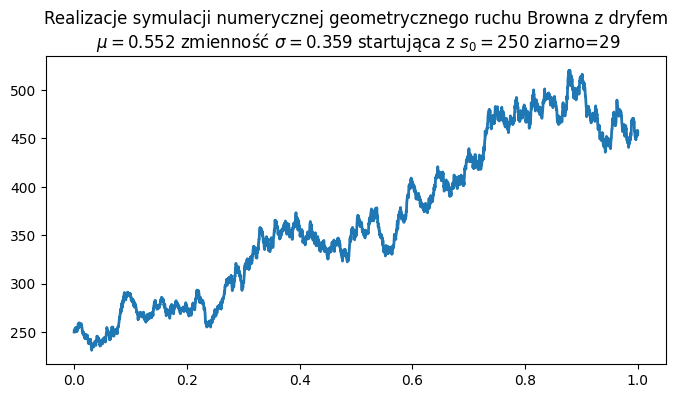

In [13]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
ax.plot(t, s, lw=2)
plt.title(
    "Realizacje symulacji numerycznej geometrycznego ruchu Browna z dryfem\n $\mu=$" + str(mu) 
    + " zmienność $\sigma=$" + str(sigma) + " startująca z $s_0=$" + str(int(s[0])) + " ziarno=" + str(29) 
)

A co jeśli symulujemy wiele niezależnych realizacji tego samego procesu w sposób wektorowy? Na szczęście dla tego konkretnego równania SDE znamy dokładne rozwiązanie podane przez

$$ S(t) = s_0 e^{\sigma  W(t)  + (\mu - \frac{\sigma^2}{2})t} $$

In [15]:
no_of_series = 300 # number of the concurrent simulations

dW = np.random.normal(0, 1, size=(n, no_of_series)) * np.sqrt(dt)

s = np.exp(
    (mu - sigma ** 2 / 2) * dt
    + sigma * sqrtdt * np.random.normal(0, 1, size=(no_of_series, n)).T
)

s = np.vstack([np.ones(no_of_series), s])

s = s0 * s.cumprod(axis=0)

<>:7: SyntaxWarning: invalid escape sequence '\m'
<>:7: SyntaxWarning: invalid escape sequence '\s'
<>:7: SyntaxWarning: invalid escape sequence '\m'
<>:7: SyntaxWarning: invalid escape sequence '\s'
C:\Users\koste\AppData\Local\Temp\ipykernel_2684\3969086059.py:7: SyntaxWarning: invalid escape sequence '\m'
  "Realizacje symulacji numerycznej geometrycznego ruchu Browna z dryfem\n $\mu=$" + str(mu) + " zmiennością $\sigma=$" + str(sigma) + " startująca z $s_0=$" + str(int(s0))
C:\Users\koste\AppData\Local\Temp\ipykernel_2684\3969086059.py:7: SyntaxWarning: invalid escape sequence '\s'
  "Realizacje symulacji numerycznej geometrycznego ruchu Browna z dryfem\n $\mu=$" + str(mu) + " zmiennością $\sigma=$" + str(sigma) + " startująca z $s_0=$" + str(int(s0))


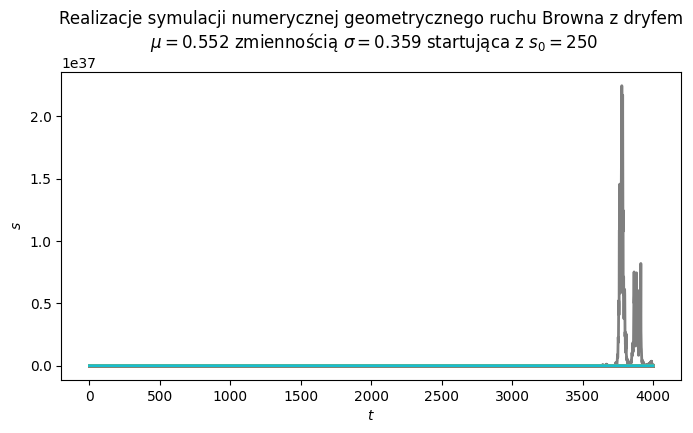

In [16]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
ax.plot(s, lw=2)

plt.xlabel("$t$")
plt.ylabel("$s$")
plt.title(r"Realizacje symulacji numerycznej geometrycznego ruchu Browna z dryfem\n $\mu=$" + str(mu) + " zmiennością $\sigma=$" + str(sigma) + " startująca z $s_0=$" + str(int(s0))
)
plt.show()